In [1]:
import numpy as np
import pandas as pd
import astropy.constants as const
#import scipy.constants as const
import astropy.units as u
import argparse
import sys
import math
import matplotlib.pyplot as plt

In [ ]:
def drop_time(h, g = 9.8): #h = positional, g = keyword
    t = ((2.0 * h) / g) ** (1/2) #Avoid using a package unless absolutely necessary
    return t

In [ ]:
#If the height is 1 m:
drop_time(10)

Machine Precision

In [ ]:
x = 1.0
eps = 1.0

while not x + eps == x:
    eps = 0.5 * eps
    
print(2 * eps)

In [ ]:
b = 0.1
print(type(b))
print("{:30.20}".format(b))
sys.float_info

In [ ]:
x = 1
y = 1 + (10e-14 * np.sqrt(2))

print(1e14 * (y-x))
print(np.sqrt(2))

In [ ]:
def quad_formula_2(a, b, c):
    #Solution 2
    x_1 = (2 * c) / (-b - np.sqrt(np.square(b) - (4 * a * c)))
    x_2 = (2 * c) / (-b + np.sqrt(np.square(b) - (4 * a * c)))
    
    return x_1, x_2  

In [ ]:
root_1, root_2 = quad_formula_2(3, 6, 1)
print(root_1)
print(root_2)

In [ ]:
def energy(n):
    
    hf = 1
    beta = 0.01
    
    #Initializers
    Z = 0
    E = 0
    
    for i in range(n):
        E_n = hf * (i + 0.5) #Energy level
        Z = Z + np.exp(-beta * E_n) #Z equation (infinite sum)
        E += E_n * np.exp(-beta * E_n) #E equation
        
    avg_E = (E/Z) #Average energy
    
    return avg_E

In [ ]:
#Hundred runs
print(f"4000 runs: {energy(4000)}")

Trapezoid Rule (Integration)

In [ ]:
def func(x): #Integration function
    return x**4 - (2*x) + 1

In [ ]:
def trap_rule(n, a = 0, b = 2, function = func):
    
    #Default paramaters
    #a (lower limit) = 0
    #b (upper limit) = 2
    #function = func
    
    h = (b - a) / n #Height
    s = (0.5 * function(a)) + (0.5 * function(b)) #Sum
    
    for k in range(1, n + 1): #Summation (range stops at n)
        s += function(a + (k * h))
        
    return (h * s) #Multiply height by the sum

In [ ]:
trap_rule(10)

Simpson's Rule

In [ ]:
def OG_simps_rule(n, a = 0, b = 2, function = func):
    
    #Default paramaters
    #a (lower limit) = 0
    #b (upper limit) = 2
    #function = func 
    
    delta_x = (b - a) / n
    
    s = function(a) + function(b)
    
    #Odd integer loop
    for k in range(1, int(n/2) + 1):
        s += 4 * function(a + (((2 * k) - 1) * delta_x))
    
    #Even integer loop
    for k in range(1, int((n/2))):
        s += 2 * function(a + (2 * k * delta_x))
        
    return (delta_x / 3) * s

In [ ]:
OG_simps_rule(1000, function = exp_func) #Ok, so the above method works... how do I adapt it to work for the plots?

In [ ]:
simpsons_rule(10)

In [ ]:
#Trapezoid rule

#10 steps
integral_10_trap = trap_rule(10)

#20 steps
integral_20_trap = trap_rule(20)

error_trap = (1/3) * abs(integral_20_trap - integral_10_trap)

print(f"Error with Trapezoid Rule: {error_trap}")

In [ ]:
#Simpson's rule

#10 steps
integral_10_simp = simpsons_rule(10)

#20 steps
integral_20_simp = simpsons_rule(20)

error_simp = (1/15) * abs(integral_20_simp - integral_10_simp)

print(f"Error with Simpson's Rule: {error_simp}")

Gaussian Quadrature

In [ ]:
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = np.max(np.abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

In [ ]:
locations, weights = gaussxwab(3, 0, 2)
print(f"Locations: {locations}\n")
print(f"Weights: {weights}")

In [ ]:
def gauss_quad(N, a = 0, b = 2, function = func): #N = Number of steps, a = Lower bound, b = Upper bound
    
    x, w = gaussxwab(N, a, b) #Calculates the x-coordinates for specific points and their weights
    
    s = 0 #Initializer variable for the sum
    
    for k in range(0, N): #Need the range to span the same indices as the x and w lists
        s += w[k] * function(x[k]) #Multiplies the weights by the y-values corresponding to each point's location
        
    return s #Returns the sum

In [ ]:
gauss_quad(3)

Differentiation

In [ ]:
def tan_func(x):
    return 1 + (0.5 * np.tanh(2*x))

In [ ]:
def analytic_deriv(x):
    return 1 / (np.cosh(2 * x) ** 2)

In [ ]:
def central_diff(x, func = tan_func):
    
    h = 10**-5
    
    return (1/h) * (func(x + (0.5 * h)) - func(x - (0.5 * h)))

In [ ]:
diff_range = np.linspace(-2, 2, 100)

fig = plt.figure(figsize = (12, 8))

plt.plot(diff_range, central_diff(diff_range), color = 'blue', label = 'Central Diff Derivative')
plt.plot(diff_range, analytic_deriv(diff_range), color = 'orangered', label = 'Analytic Derivative')

plt.grid()
plt.legend(loc = 'upper left', fontsize = 15)

# HW - Integration

In [ ]:
def exp_func(t):
    return np.e ** (-(t ** 2))

In [ ]:
#Trapezoid rule

def trap_rule(N, a = 0, b = 3, step_size = 0.1, function = exp_func):
    
    """
    This function integrates a given function using the trapezoidal method. This function will integrate over
    bounds of 0 (lower) and 3 (upper), but the user can change the bounds if desired. The given function will
    be iterated over increments of 0.1, which is considered the "step size." Similarly to the bounds, the user
    can change the step size if desired. 
    
    The integral will be iterated N times, where the upper bounds changes from a (0) to b(3) via step_size (0.1)
    increments (ex: ingerate from 0 to 0.1, 0 to 0.2, etc.). With each iteration of the 'for loop,' delta_x will
    change depending on the upper bound, and from there, we can calculate the area of a trapezoidal segment.
    Every time the upper bound changes, the trapezoid's areas will be summed together. After calculating the area,
    it will be added to the trapezoidal method's integration equation, and the answer for the integral will be
    added to an array (sum_trap). x_range and sum_trap will then be returned, so the values can be plotted.
    
    
    Parameters:
        N (int) = Number of times an integral will be calculated (positional argument)
        a (int or float) = Lower bound for the integral (keyword argument)
        b (int or float) = Upper bound for the integral (keyword argument)
        step_size (float) = Incremental change of bounds (keyword argument)
        function (function name) = Function being integrated (keyword argument)
    
    Values:
        area_trap (float) = Area corresponding to each trapezoidal segment
        delta_x (float) = Height of each trapezoidal segment 
        
    
    Returns:
        x_range (np.array) = Array of increments spanning the upper and lower bound, where the increments are
                             dependent on the step size
        sum_trap (list) = List of sums corresponding to each iteration of the integration method
        
    
    """
    
    x_range = np.arange(a, b, step_size)
    
    sum_trap = [] #List of each trapezoid slice's sum
    
    for i in x_range: #Range of summation (range stops at N)
        
        area_trap = 0 #Area of individual trapezoid slice
        
        delta_x = (i - a) / N #Change in x for each iteration of the integration
        
        for j in range(N + 1): #Loops N times
            area_trap += function(a + (j * delta_x)) #Sum for each iteration
            
        lower_end_point = 0.5 * function(a) #Starting value
        upper_end_point = 0.5 * function(i) #Ending value
        
        #Integration equation for trapezoidal method
        integral_trap = delta_x * (lower_end_point + area_trap + upper_end_point)
        
        sum_trap.append(integral_trap) #Appends each trapezoid's sums together
        
    print(f"Trapezoid rule with step size of {step_size} = {integral_trap:.3f}")
        
    return sum_trap, x_range #Multiplies height by the sum

In [ ]:
sum_trap, x_range = trap_rule(1000)

In [ ]:
type(sum_trap[0]) #Calculations check out for this method (Wolfram Alpha agrees for the most part)

In [ ]:
fig = plt.figure(figsize = (12, 8))

plt.xlabel('t', fontsize = 15)
plt.ylabel('Sum', fontsize = 15)
plt.title('Integrating With Trapezoidal Method', fontsize = 20)

plt.scatter(x_range, sum_trap, color = 'blue')

plt.grid()
plt.show()

In [ ]:
#Simpsons Rule

def simpsons_rule(N, a = 0, b = 3, step_size = 0.1, function = exp_func):
    
    """
    This function integrates a given function using the Simpson's rule. This function will integrate over
    bounds of 0 (lower) and 3 (upper), but the user can change the bounds if desired. The given function will
    be iterated over increments of 0.1, which is considered the "step size." Similarly to the bounds, the user
    can change the step size if desired. 
    
    The integral will be iterated N times, where the upper bounds changes from a (0) to b(3) via step_size (0.1)
    increments (ex: ingerate from 0 to 0.1, 0 to 0.2, etc.). With each iteration of the 'for loop,' delta_x will
    change depending on the upper bound, and from there, we can calculate the area under the curve that spans a
    specific bound range. Every time the upper bound changes, the areas will be summed together. After calculating
    the area, it will be added to the Simpson method's integration equation, and the answer for the integral will
    be added to an array (sum_simp). x_range and sum_simp will then be returned, so the values can be plotted.
    
    Parameters:
        N (int) = Number of times an integral will be calculated (positional argument)
        a (int or float) = Lower bound for the integral (keyword argument)
        b (int or float) = Upper bound for the integral (keyword argument)
        step_size (float) = Incremental change of bounds (keyword argument)
        function (function name) = Function being integrated (keyword argument)
    
    Values:
        area_simp (float) = Area under the curve corresponding to different bound ranges
    
    Returns:
        x_range (np.array) = Array of increments spanning the upper and lower bound, where the increments are
                             dependent on the step size
        sum_simp (list) = List of sums corresponding to each iteration of the integration method
    
    """
    
    x_range = np.arange(a, b, step_size)
    
    sum_simp = [] #List of each trapezoid slice's sum
        
    for i in x_range:
        
        area_simp = 0 #Area under the curve of a specific integration bound
        
        delta_x = (i - a) / N #Change in x for each iteration of the integration
        
        lower_end_point = function(a) #Stays constant
        upper_end_point = function(i) #Upper bound incrementally increases by the step_size value every iteration
        
        #Odd integer loop
        for k in range(1, int(N/2) + 1):
            area_simp += 4 * function(a + (((2 * k) - 1) * delta_x))
    
        #Even integer loop
        for k in range(1, int((N/2))):
            area_simp += 2 * function(a + (2 * k * delta_x))
                
        integral_simp = (delta_x/3) * (lower_end_point + area_simp + upper_end_point) #Simpson's equation
        
        sum_simp.append(integral_simp) #Appending each set of bounds' integrations to a list    
        
    #print(f"Simpson's rule with step size of {step_size} = {integral_simp:.3f}")
        
    return x_range, sum_simp, integral_simp

In [ ]:
x_range, sum_simp, integral_simp  = simpsons_rule(100) #This method isn't working very well

sum_simp

In [ ]:
fig = plt.figure(figsize = (12, 8))

plt.xlabel('t', fontsize = 15)
plt.ylabel('Sum', fontsize = 15)
plt.title('Integrating With Simpsons Method', fontsize = 20)

plt.plot(x_range, sum_simp, color = 'orangered')

plt.grid()
plt.show()

In [ ]:
#Comparing both methods

fig = plt.figure(figsize = (12, 8))

plt.xlabel('t', fontsize = 15)
plt.ylabel('Sum', fontsize = 15)
plt.title('Integrating With Simpsons Method', fontsize = 20)

plt.plot(x_range, sum_simp, color = 'orangered', linewidth = 3, label = 'Simpsons')
plt.plot(x_range, sum_trap, color = 'blue', linewidth = 2, linestyle = '--', label = 'Trapezoidal')

plt.grid()
plt.legend(loc = 'lower right', fontsize = 15)
plt.show()

In [ ]:
def plotting_integral(x_range, sum_list):
    
    fig = plt.figure(figsize = (12, 8))

    plt.xlabel('t', fontsize = 15)
    plt.ylabel('Sum', fontsize = 15)

    if sum_list == sum_simp:
        plt.title('Integrating With Simpsons Method', fontsize = 20)
        plt.plot(x_range, sum_list, color = 'orangered', label = 'Simpsons')
        
    if sum_list == sum_trap:
        plt.title('Integrating With Trapezoidal Method', fontsize = 20)
        plt.plot(x_range, sum_trap, color = 'blue', label = 'Trapezoidal')

    plt.grid()
    plt.legend(loc = 'lower right', fontsize = 15)
    plt.show()

In [ ]:
plotting_integral(x_range, sum_simp)

In [ ]:
sum_trap[-1]

In [ ]:
def plotting_integral(x_range, sum_list, method_type):
    
    fig = plt.figure(figsize = (12, 8))

    plt.xlabel('t', fontsize = 15)
    plt.ylabel('Sum', fontsize = 15)

    #if sum_list == sum_simp:
        #plt.title('Integrating With Simpsons Method', fontsize = 20)
        #plt.plot(x_range, sum_list, color = 'orangered', label = 'Simpsons')
        
    if method_type == 'trapezoidal':
        plt.title('Integrating With Trapezoidal Method', fontsize = 20)
        plt.plot(x_range, sum_list, color = 'blue', label = 'Trapezoidal')
        
    if method_type == 'both':
        plt.title('Integrating With Trapezoid and Simpsons Method', fontsize = 20)

        plt.plot(x_range, sum_simp, color = 'orangered', linewidth = 3, label = 'Simpsons')
        plt.plot(x_range, sum_trap, color = 'blue', linewidth = 2, linestyle = '--', label = 'Trapezoidal')


    plt.grid()
    plt.legend(loc = 'lower right', fontsize = 15)
    plt.show()

In [ ]:
plotting_integral(x_range, sum_trap, 'trapezoidal')

Relaxation method

In [ ]:
def relax_func(x, c):
    x = 1 - (np.exp(-c * x))
    return x

In [ ]:
def relax_method(x_guess, c = 2, func = relax_func):

    num_iterations = 0 #Increases by 1 for each iteration
    
    answer = 0 #Initial value
    
    max_iterations = 100000
    
    while x_guess != answer or num_iterations < max_iterations: 
        answer = relax_func(x_guess, c)
        x_guess = answer #New guess value = answer from last calculation
        num_iterations += 1
        
    return answer

In [ ]:
answer = relax_method(1)

answer

In [ ]:
c_range = np.arange(0, 3, 0.1)

answer_c_list = []

for c_val in c_range: #Go through the c_range OUTSIDE of the function - answers converge for each step
    answer = relax_method(1, c = c_val)
    answer_c_list.append(answer)

In [ ]:
fig = plt.figure(figsize = (12, 8))

plt.xlabel('c', fontsize = 15)
plt.ylabel('x', fontsize = 15)
plt.title('Relaxation Method', fontsize = 20)

plt.scatter(c_range, answer_c_list, color = 'blue')
plt.grid()
plt.show()

Newton's Method

In [2]:
def legendre_polynomial(x):
    const_list = [924, 2772, 3150, 1680, 420, 42, 1]
    P = (const_list[0] * (x ** 6)) - (const_list[1] * (x ** 5)) + (const_list[2] * (x ** 4)) - (const_list[3] * (x ** 3)) + (const_list[4] * (x ** 2)) - (const_list[5] * x) + const_list[6]
    return P

In [3]:
def deriv_legendre(x):
    const_list = [924, 2772, 3150, 1680, 420, 42, 1]
    P_prime = (6 * const_list[0] * (x ** 5)) - (5 * const_list[1] * (x ** 4)) + (4 * const_list[2] * (x ** 3)) - (3 * const_list[3] * (x ** 2)) + (2 * const_list[4] * x) - const_list[5]
    return P_prime

In [5]:
x_range = np.arange(0, 1, 0.01)

P_vals = []
P_prime_vals = []

for x in x_range:
    P_vals.append(legendre_polynomial(x))
    P_prime_vals.append(deriv_legendre(x))

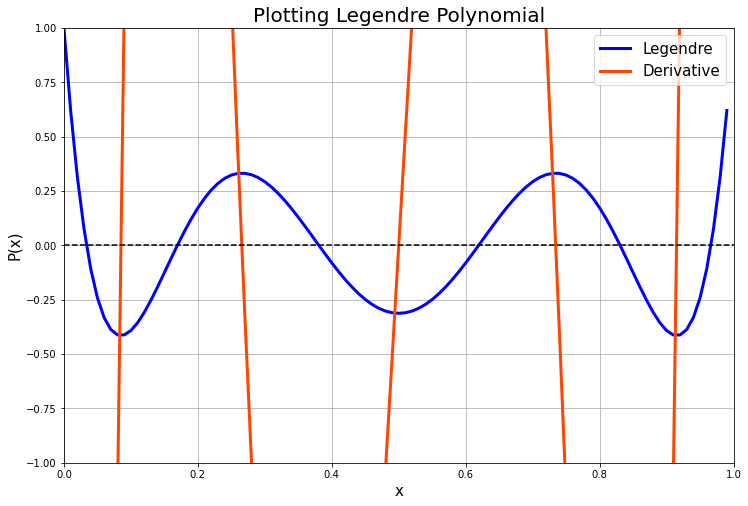

In [6]:
fig = plt.figure(figsize = (12, 8))

plt.xlabel('x', fontsize = 15)
plt.ylabel('P(x)', fontsize = 15)
plt.title('Plotting Legendre Polynomial', fontsize = 20)

plt.xlim(0, 1)
plt.ylim(-1, 1)

plt.plot(x_range, P_vals, color = 'blue', linewidth = 3, label = 'Legendre')
plt.plot(x_range, P_prime_vals, color = 'orangered', linewidth = 3, label = 'Derivative')

plt.axhline(y = 0, color = 'black', linestyle = '--')

plt.legend(loc = 'upper right', fontsize = 15)

plt.grid()
plt.show()

In [26]:
root_guesses = [0.03, 0.15, 0.38, 0.62, 0.85, 0.93]

def newtons_method(x_1, f = legendre_polynomial, f_prime = deriv_legendre, tol = 1e-10, max_iter = 100000):
    num_iter = 0
    
    x_2 = x_1 - (f(x_1) / f_prime(x_1)) #x_2 isn't dependent on the second guess. It's dependent on P(x_1) and its derivative.
    
    while abs(x_2 - x_1) > tol: #Make sure the derivative isn't 0, or the function will fail
        num_iter += 1
        x_1 = x_2 #x_1 keeps changing until a root is found
        x_2 = x_1 - (f(x_1) / f_prime(x_1))
        
        if num_iter > max_iter: #Will be an infinite loop if we don't define the max iterations
            print(f"Did not converge after {max_iter} iterations.")
            return None #Won't return any values
    return x_2

In [27]:
roots = []

for guess in root_guesses:
    answer = newtons_method(guess)
    
    if answer is not None:
        roots.append(answer)

In [28]:
roots

[0.03376524289842399,
 0.16939530676686787,
 0.38069040695840195,
 0.6193095930415999,
 0.8306046932331075,
 0.9662347571015882]

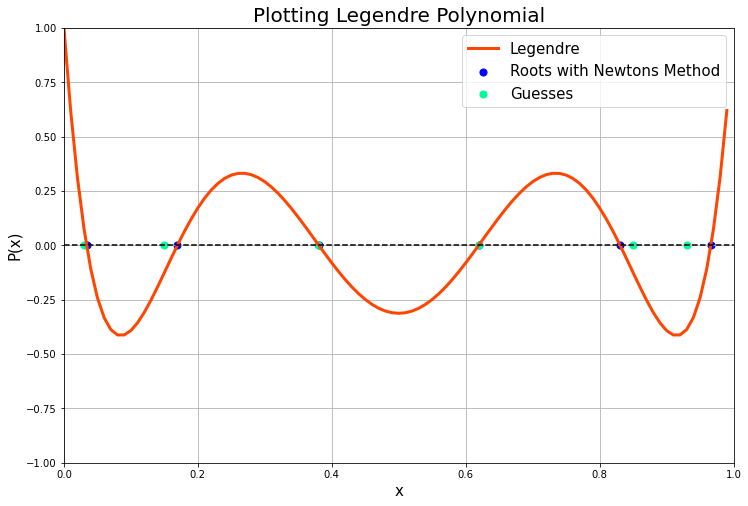

In [66]:
fig = plt.figure(figsize = (12, 8))

plt.xlabel('x', fontsize = 15)
plt.ylabel('P(x)', fontsize = 15)
plt.title('Plotting Legendre Polynomial', fontsize = 20)

plt.xlim(0, 1)
plt.ylim(-1, 1)

plt.plot(x_range, P_vals, color = 'orangered', linewidth = 3, label = 'Legendre')

plt.scatter(roots, np.zeros(6), color = 'blue', s = 50, label = 'Roots with Newtons Method')

plt.scatter(root_guesses, np.zeros(6), color = 'mediumspringgreen', s = 50, label = 'Guesses')

plt.axhline(y = 0, color = 'black', linestyle = '--')

plt.legend(loc = 'upper right', fontsize = 15)

plt.grid()
plt.show()

In [58]:
#Let's try the secant method now (maybe I shouldn't worry about the guesses right now)

def secant_method(x_1, x_2, f = legendre_polynomial, tol = 1e-10, max_iter = 100000):#Method isn't working
    #For the secant method, we're using pairs of points to find the roots
    
    num_iter = 0
    
    x_3 = x_2  - (f(x_2) * x_2  - ((x_2 - x_1) / (f(x_2) - f(x_1))))
    
    while abs(x_2 - x_3) > tol:
        num_iter += 1
        
        x_1 = x_2
        x_2 = x_3
        
        x_3 = x_2  - (f(x_2) * ((x_2 - x_1) / (f(x_2) - f(x_1))))
        
        if num_iter > max_iter: #Will be an infinite loop if we don't define the max iterations
            print(f"Did not converge after {max_iter} iterations.")
            return None #Won't return any values
    return x_3
        

In [61]:
sec_roots = []


for i in range(len(root_guesses)):
    if i < len(root_guesses) - 1:
        answer = secant_method(root_guesses[i], root_guesses[i + 1])
        
        if answer is not None:
            sec_roots.append(answer)
    
    #if answer is not None:
        #sec_roots.append(answer)

In [62]:
sec_roots

[0.16939530676686776,
 0.3806904069584066,
 0.6201171875,
 0.8306046932331677,
 0.9662347571015896]

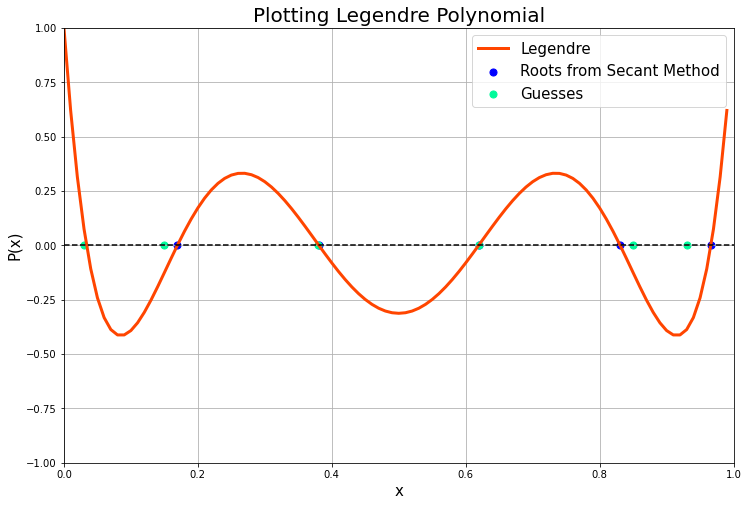

In [65]:
fig = plt.figure(figsize = (12, 8))

plt.xlabel('x', fontsize = 15)
plt.ylabel('P(x)', fontsize = 15)
plt.title('Plotting Legendre Polynomial', fontsize = 20)

plt.xlim(0, 1)
plt.ylim(-1, 1)

plt.plot(x_range, P_vals, color = 'orangered', linewidth = 3, label = 'Legendre')

plt.scatter(sec_roots, np.zeros(5), color = 'blue', s = 50, label = 'Roots from Secant Method')

plt.scatter(root_guesses, np.zeros(6), color = 'mediumspringgreen', s = 50, label = 'Guesses')

plt.axhline(y = 0, color = 'black', linestyle = '--')

plt.legend(loc = 'upper right', fontsize = 15)

plt.grid()
plt.show()

# HW - Lagrange Point

In [2]:
def lagrange(r):
    G = const.G
    M = const.M_earth
    m = 7.348e22 * u.kg
    R = 3.844e8 * u.m
    omega = 2.662e-6 * (1/u.s)
    
    L = ((G * M) / np.square(r * u.m)) - ((G * m) / np.square(R - (r * u.m))) - (np.square(omega) * (r * u.m))
    
    return L

In [11]:
x_range = np.linspace(1e7, 1e9, 1000)
y_vals = []

for x in x_range:
    y_vals.append(lagrange(x).value)

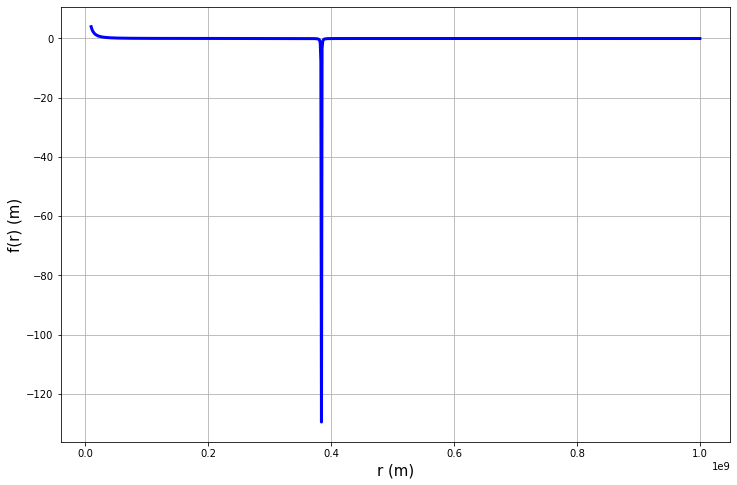

In [12]:
fig = plt.figure(figsize = (12, 8))

#plt.xlim(3.8e8, 3.9e8)
#plt.ylim(-100, 10)

plt.xlabel('r (m)', fontsize = 15)
plt.ylabel('f(r) (m)', fontsize = 15)

plt.plot(x_range, y_vals, color = 'blue', linewidth = 3)

plt.grid()
plt.show()